In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [30]:
df=pd.read_csv("pima-indians-diabetes .csv")

In [31]:
df.shape

(768, 9)

In [32]:
df.head()

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Preg    768 non-null    int64  
 1   Plas    768 non-null    int64  
 2   Pres    768 non-null    int64  
 3   skin    768 non-null    int64  
 4   test    768 non-null    int64  
 5   mass    768 non-null    float64
 6   pedi    768 non-null    float64
 7   age     768 non-null    int64  
 8   class   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [34]:
df.isnull().sum()

Preg     0
Plas     0
Pres     0
skin     0
test     0
mass     0
pedi     0
age      0
class    0
dtype: int64

### Data Preparation

##### Removing Duplicates

In [35]:
duplicate=df.duplicated()
duplicate.sum()

0

<Axes: >

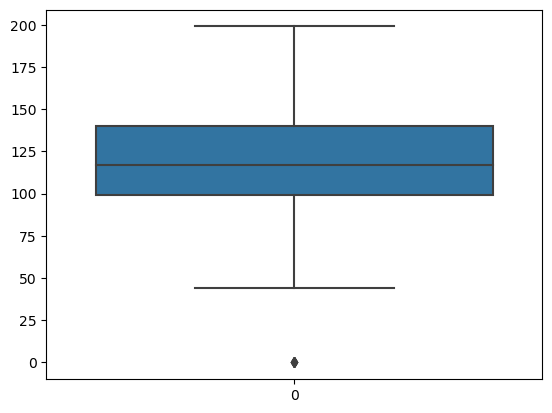

In [36]:
sns.boxplot(df["Plas"])

<Axes: >

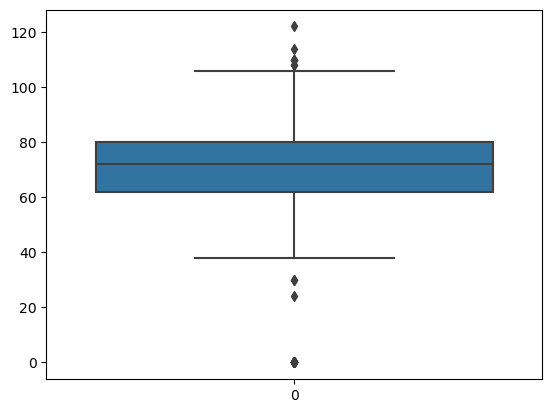

In [37]:
sns.boxplot(df["Pres"])

<Axes: >

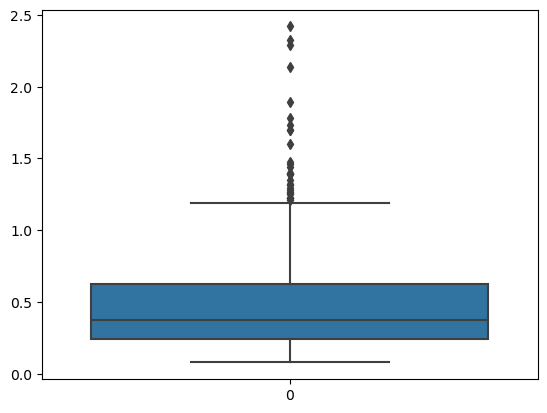

In [38]:
sns.boxplot(df["pedi"])

<Axes: >

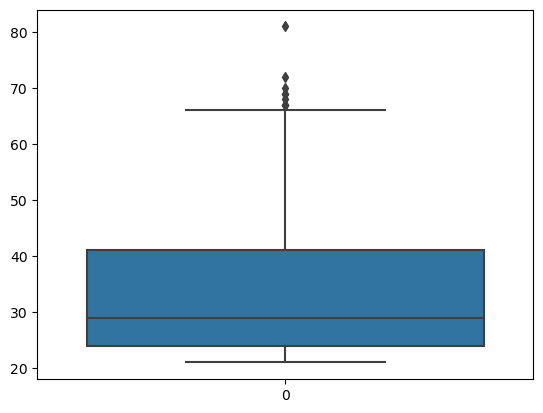

In [39]:
sns.boxplot(df["age"])

<Axes: >

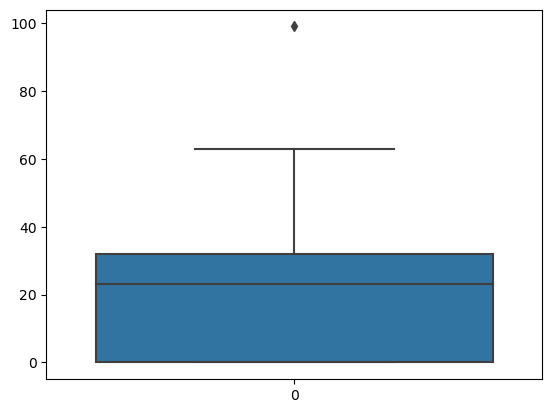

In [40]:
sns.boxplot(df["skin"])

<Axes: >

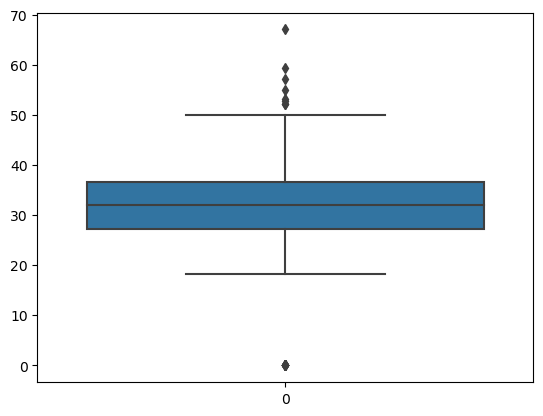

In [41]:
sns.boxplot(df["mass"])

<Axes: >

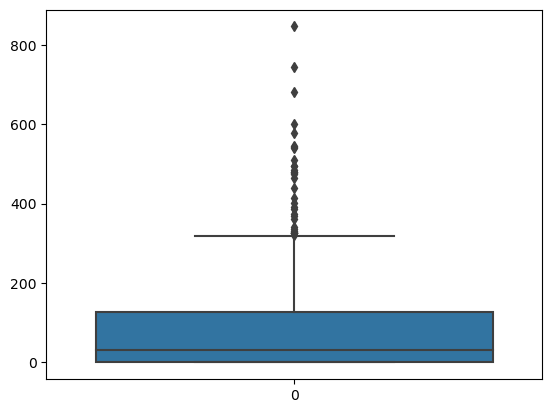

In [42]:
sns.boxplot(df["test"])

In [43]:
def remove_outlier(col):
    sorted(col)
    q1,q3=col.quantile([0.25,0.75])
    iqr=q3-q1
    lower_range=q1-(1.5*iqr)
    upper_range=q3+(1.5*iqr)
    return lower_range,upper_range

In [44]:
lowage,highage=remove_outlier(df["age"])

In [45]:

df["age"]=np.where(df["age"]>highage,highage,df["age"])
df["age"]=np.where(df["age"]<lowage,lowage,df["age"])

<Axes: >

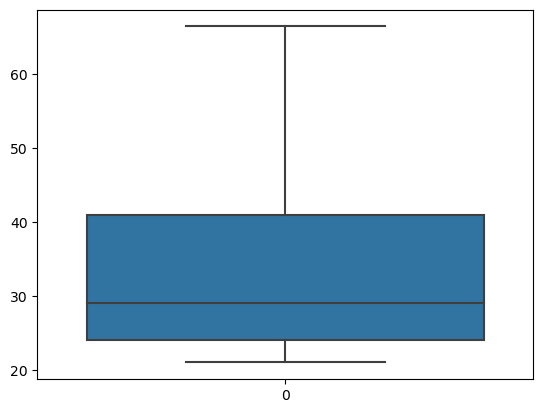

In [46]:
sns.boxplot(df["age"])

In [47]:
df.shape

(768, 9)

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Preg    768 non-null    int64  
 1   Plas    768 non-null    int64  
 2   Pres    768 non-null    int64  
 3   skin    768 non-null    int64  
 4   test    768 non-null    int64  
 5   mass    768 non-null    float64
 6   pedi    768 non-null    float64
 7   age     768 non-null    float64
 8   class   768 non-null    int64  
dtypes: float64(3), int64(6)
memory usage: 54.1 KB


In [49]:
pd.set_option("display.max_rows",None)
pd.set_option("display.max_columns",None)

In [50]:
df["Plas"].value_counts()

99     17
100    17
111    14
129    14
125    14
106    14
112    13
108    13
95     13
105    13
102    13
122    12
109    12
117    11
124    11
90     11
107    11
128    11
120    11
119    11
114    11
115    10
84     10
146     9
101     9
92      9
88      9
97      9
91      9
126     9
103     9
123     9
136     8
96      8
139     8
158     8
137     8
130     7
94      7
93      7
144     7
85      7
87      7
147     7
116     7
151     6
83      6
173     6
81      6
80      6
134     6
162     6
143     6
154     6
104     6
121     6
89      6
110     6
118     6
155     5
132     5
127     5
142     5
140     5
141     5
145     5
138     5
113     5
180     5
131     5
181     5
0       5
179     5
133     5
135     4
165     4
152     4
148     4
168     4
78      4
74      4
71      4
197     4
187     4
189     4
166     3
196     3
184     3
164     3
167     3
86      3
161     3
194     3
98      3
82      3
183     3
171     3
68      3
163     3
150     3


In [51]:
##### Missing values

median1=df["Plas"].median()
median2=df["Pres"].median()
median3=df["skin"].median()
median4=df["test"].median()
median5=df["mass"].median()
median6=df["pedi"].median()
median7=df["age"].median()
print(median1)
print(median2)
print(median3)
print(median4)
print(median5)
print(median6)
print(median7)

117.0
72.0
23.0
30.5
32.0
0.3725
29.0


In [52]:
df["Plas"]=df["Plas"].replace(0,median1)
df["Pres"]=df["Pres"].replace(0,median2)
df["skin"]=df["skin"].replace(0,median3)
df["test"]=df["test"].replace(0,median4)
df["mass"]=df["mass"].replace(0,median5)
df["pedi"]=df["pedi"].replace(0,median6)
df["age"]=df["age"].replace(0,median7)

In [53]:
df["Plas"].value_counts()

99     17
100    17
117    16
129    14
125    14
106    14
111    14
112    13
108    13
95     13
105    13
102    13
122    12
109    12
124    11
90     11
107    11
128    11
120    11
119    11
114    11
115    10
84     10
146     9
101     9
92      9
88      9
97      9
91      9
126     9
103     9
123     9
136     8
96      8
139     8
158     8
137     8
130     7
94      7
93      7
144     7
85      7
87      7
147     7
116     7
151     6
83      6
173     6
81      6
80      6
134     6
162     6
118     6
104     6
121     6
89      6
110     6
143     6
154     6
141     5
155     5
132     5
127     5
142     5
140     5
133     5
145     5
138     5
113     5
180     5
131     5
181     5
179     5
165     4
152     4
135     4
148     4
168     4
78      4
74      4
71      4
197     4
187     4
189     4
166     3
196     3
184     3
164     3
167     3
86      3
161     3
194     3
98      3
82      3
183     3
171     3
68      3
163     3
150     3
73      3


In [54]:
df.isnull().sum()

Preg     0
Plas     0
Pres     0
skin     0
test     0
mass     0
pedi     0
age      0
class    0
dtype: int64

In [55]:
df.describe()

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,27.334635,94.652344,32.450911,0.471876,33.199870,0.348958
std,3.369578,30.438286,12.096642,9.229014,105.547598,6.875366,0.331329,11.628404,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,23.000000,30.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,31.250000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,66.500000,1.000000
